# Data Preprocessing

Описание дынных. Исходный датасет имеет 5 переменных.4 первых переменных - это независимые. Последнюю переменную "Purchased" - обозначим как зависимую переменную. Из независимых переменных у нас имеется три числовых и 1 текстовая. Переменная "Purchased" состоит из числовых показателей со значением 0 и 1. Конвертируем наш документ в формат csv с разделителем "запятая". Осуществим подготовку данных, импортировав необходимые библиотеки.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загрузим наш предварительно конвертированный файл.

In [2]:
# Importing the dataset
df = pd.read_csv('zadacha_2.csv', sep=',')

Выведем данные на экран чтобы убедиться в правильности отображения. Имеем 5 колонок и 400 строк.

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,0.0
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0
...,...,...,...,...,...
395,15691863.0,Female,46.0,41000.0,1.0
396,15706071.0,Male,51.0,23000.0,1.0
397,15654296.0,Female,50.0,20000.0,1.0
398,15755018.0,Male,36.0,33000.0,0.0


Для определения пропущенных значений в переменных выведем общее количество и процент пропусков по переменным. 

In [4]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Purchased,0,0.0
EstimatedSalary,0,0.0
Age,0,0.0
Gender,0,0.0
User ID,0,0.0


Как видим, пропущенных занчений нет

Выведем статистику по числовым переменным.

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Проведем проверку типов данных по переменным и выявим соответствие.

In [6]:
df.dtypes

User ID            float64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased          float64
dtype: object

Построим графики распределения функций. 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


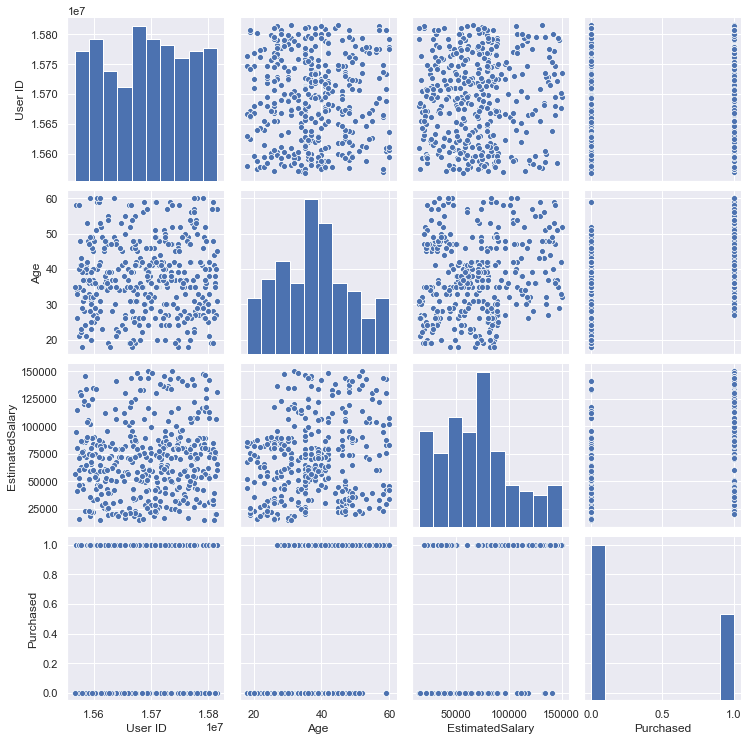

In [7]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Осуществим работы с выбросами в числовых переменных. Для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [8]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от  выбросов переменные и повторно выведем статистику.

In [9]:
# Outliers
df = outliers(df)
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


В результате выполнения очистки можно наблюдать, что показатели максимального, минимального, среднего значений, а также стандартного отклонения не изменились и соответствуют нормальному распределению, что говорит об отсутствии выбросов.

Построим корреляционную матрицую Данная матрица необходима для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель. Как можно определить изначально, большее влияние имеет переменная , Age, потом EstimatedSalary.

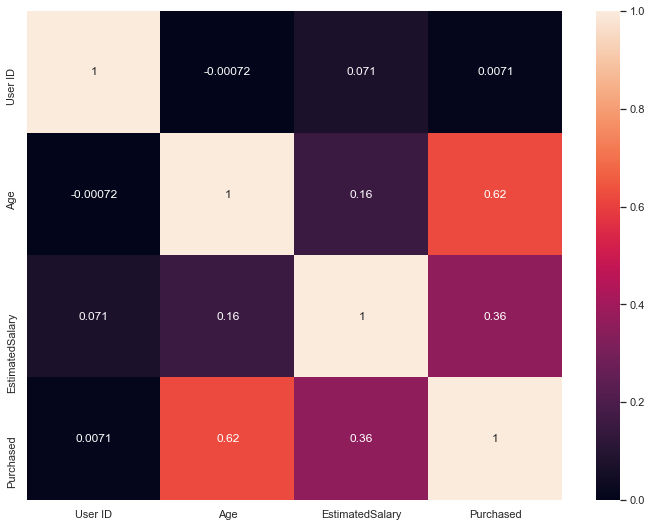

In [10]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Logistic Regression

В нашем датасете присутствуют качественные переменные. Их необходимо закодировать с помощью функции.
Запишем список нечисловых переменных и проведем кодирование качественных переменных. Результат запишем обратно в базу.

In [11]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [12]:
# Encoding categorical data
df = encoding_char(df)

In [13]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,0,19.0,19000.0,0.0
1,15810944.0,0,35.0,20000.0,0.0
2,15668575.0,1,26.0,43000.0,0.0
3,15603246.0,1,27.0,57000.0,0.0
4,15804002.0,0,19.0,76000.0,0.0
...,...,...,...,...,...
395,15691863.0,1,46.0,41000.0,1.0
396,15706071.0,0,51.0,23000.0,1.0
397,15654296.0,1,50.0,20000.0,1.0
398,15755018.0,0,36.0,33000.0,0.0


Разделим наш датасет на обучающую и тестовую выборку по пропорции 20% на 80%

In [14]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Проведем шкалирование данных. Из библиотеки импортируем класс StandardScaler и рассчитаем и запишем в переменную необходимые 
параметры шкалирования, посчитанные на основе обучающей выборки. Затем с использованием жтих параметров шкалируем обучающую и 
тестовую выборкую. Эндогенная переменная в шкалировании не нуждается. Она должна быть дискретного типа 0;1. Что у нас и есть.

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Строим базовую модель. Для жтого из библиотеки statsmodels с помощью ф-и Logit посмотрим отчет по модели. Видим, что  
переменные Х3 и Х4 значимыми,  т.к. их значения Р не превышают 1%. Поэтому оставим только их

In [16]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.380721
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.425     
Dependent Variable: y                AIC:              251.6615  
Date:               2021-01-12 20:45 BIC:              266.7348  
No. Observations:   320              Log-Likelihood:   -121.83   
Df Model:           3                LL-Null:          -211.70   
Df Residuals:       316              LLR p-value:      1.0042e-38
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1     -0.0549      0.1639    -0.3353    0.7374    -0.3761    0.2662
x2     -0.1354      0.1612    -0.8399    0.4010    -0.

Проведем автоматический отбор переменных для того, чтгобы убдедиться в правильности нашего выбора. Как видим, наше предположение о возможности оставить все переменные оказлось правильным. (автоматический отбор также определил переменную Х2 как значимую, но мы не будем бать ее и оставим Х3 и Х4)

In [17]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

3
[False  True  True  True]
[2 1 1 1]


Выведем индексы отобранных переменных.

In [18]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[1, 2, 3]
№	Index	Feature
0	1	Gender
1	2	Age
2	3	EstimatedSalary


Преобразуем обучающую и тестовую выборки, оставив в ней только значимые переменные. Age и EstimatedSalary

In [19]:
# p-value < 1% Features
X_train = X_train[:,[2,3]]
X_test = X_test[:,[2,3]]

Обучим модель логистическй регрессии на 2 переменных.

In [20]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

Проведем прогноз на тестовой выборке и оценим качетво модели. Уровень качества высокий, 83,7% объектов распознаны верно.

In [21]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8375

Выведем таблицу сопряженности, которая показывает, что 6 позитивных объектов распознаны как негативные, а 7
негативных определены как позитивные.

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  7]
 [ 6 17]]


Произведем расчет доли ошибки, чувствителности и специфичности модели.

In [23]:
Error_rate = (5+7)/(80)
Error_rate

0.15

In [24]:
Se = 18/(18+5)
Se

0.782608695652174

In [25]:
Sp = 50/(50+7)
Sp

0.8771929824561403

Итак, можно увидеть, что в модели логистической регрессии чувствительность составляет 78%, специфичность 87%.Это говорит, что модель приблизительно одинаково пределяет как определяет истинно негативные, так и истинно позитивные случаи. Доля ошибки низкая = 15%, точность высокая = 83,75%. Это наш базовый уровень для построения Нейронной Сети.

# Classification Neural Network

Рассмотрим модель классификации, основанную на нейронных сетях. Импортируем библиотеки, данные и модули.

In [26]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Построим нейронную сеть прямой передачи сигнала. Обычно для этого используется сужающая архитектура, где число нейронов на первом слое не превышает число нейронов на входном слое. Т.к. у нас 2 параметра классификации - на входном слое у нас будет 2 нейронов. Поэтому на первом слое возьмем количество меньшее, равное 5. используем функцию активации "relu". На втором слое выберем один нейрон, т.к. одного элемента со значением 0;1 будет достаточно. Число выходов классификатора= число классов -1. Используем сигмоидальную ф-ю, т.к. она изменяется в интервале [0;1].

In [27]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Обучаем модель партиями по 8 объектов в течении 100 эпох.

In [28]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6919 - accuracy: 0.6156 - val_loss: 0.6880 - val_accuracy: 0.7125
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.6250 - val_loss: 0.6809 - val_accuracy: 0.7125
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.6250 - val_loss: 0.6724 - val_accuracy: 0.7125
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6250 - val_loss: 0.6600 - val_accuracy: 0.7125
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.6250 - val_loss: 0.6440 - val_accuracy: 0.7125
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6250 - val_loss: 0.6279 - val_accuracy: 0.7125
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.6250 - val_loss: 0.6109 - val_accuracy: 0.7125
Epoch 8/100


Epoch 59/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8531 - val_loss: 0.3438 - val_accuracy: 0.8625
Epoch 60/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8531 - val_loss: 0.3432 - val_accuracy: 0.8625
Epoch 61/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8562 - val_loss: 0.3422 - val_accuracy: 0.8625
Epoch 62/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8562 - val_loss: 0.3416 - val_accuracy: 0.8625
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.8562 - val_loss: 0.3410 - val_accuracy: 0.8625
Epoch 64/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8594 - val_loss: 0.3401 - val_accuracy: 0.8625
Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8594 - val_loss: 0.3396 - val_accuracy: 0.8625
Epoch 

Произведем прогноз на тестовой выборке, задав порог = 0,6

In [29]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.6)

Выведем таблицу сопряженности, которая показывает, что 6 позитивных объектов распознаны как негативные, а 7
негативных определены как позитивные.

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  7]
 [ 6 17]]


Произведем расчет доли ошибки, чувствителности и специфичности модели.

In [32]:
Accurary_rate = (50+17)/(80)
Accurary_rate

0.8375

In [33]:
Error_rate = (6+7)/(80)
Error_rate

0.1625

In [34]:
Se = 17/(17+6)
Se

0.7391304347826086

In [35]:
Sp = 50/(50+7)
Sp

0.8771929824561403

По сравнению с простой логистической регрессией(83.7%) модель НС имеет абсолютно одинаковую точность = 83,75%. Доля ошибок увеличилась с 15 % до 16,25.
При этом снизилась чувстивельность с 78% до 73%, а специфичность осталась такой же 87,7%  

Вывод:
* обе можели одинаково хорошо описывают нашу выборку данных. По моему мнению, их можно использовать обе. 

Hierarchical Clustering

Рассмотрим метод для определения оптиального числа кластеров - метод дерева решений. Импортируем библиотеки, данные и модули.

In [36]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Выведем данные на экран чтобы убедиться в правильности отображения. Имеем 5 колонок и 400 строк.

In [37]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,0,19.0,19000.0,0.0
1,15810944.0,0,35.0,20000.0,0.0
2,15668575.0,1,26.0,43000.0,0.0
3,15603246.0,1,27.0,57000.0,0.0
4,15804002.0,0,19.0,76000.0,0.0
...,...,...,...,...,...
395,15691863.0,1,46.0,41000.0,1.0
396,15706071.0,0,51.0,23000.0,1.0
397,15654296.0,1,50.0,20000.0,1.0
398,15755018.0,0,36.0,33000.0,0.0


Отшкалируем данные, используя MinMaxScaler, переведя наши данные в диапазон от 0 до 1 с округлением.  Используем мин-макс шкалирование т.к. он не внесет никаких дополнительных изменений. Вывыдем результат в таблицу, подписав соответственно названия столбцов.

In [38]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['User ID','Gender','Age','EstimatedSalary','Purchased']).round()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
395,1.0,1.0,1.0,0.0,1.0
396,1.0,0.0,1.0,0.0,1.0
397,0.0,1.0,1.0,0.0,1.0
398,1.0,0.0,0.0,0.0,0.0


Используем способ дерева решений или дендрограммы для определения количества кластеров

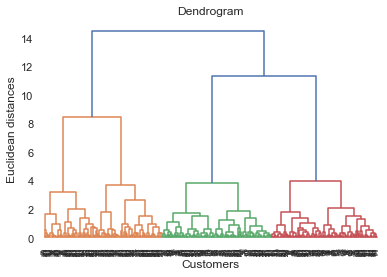

In [39]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Как видим, тут можно выделить три кластера, также можно разбить и на 6 кластеров. Существует вариант деления на 2 кластера, но это не представляет для нас интереса. 

Проведем деление на 3 кластера. 

In [40]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [41]:
hc

array([2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0,
       1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0,

In [43]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('ZD2.pkl', 'wb')
pickle.dump(obj, output, 3)
output.close()

Посмотрим  на метод локтя для алгоритмя к-средних. Это нужно для того, чтобы видеть, сколько кластеров имеет смысл выделить. Прогоним наш алгоритм в цикле от 1 до 11 кластеров.  Посмотрим как будет изменяться функция расстояния от ядра до объектов кластера и отобразим на графике.

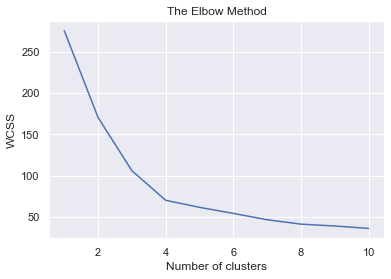

In [44]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Видим, что функция падает при 2х и 3х кластерах, потом на 4м скорость плавно падает. 

Еще один метод для определения оптиального числа кластеров - метод силуэта. Применим для рассчета кластеров от 2х до 7ми. 

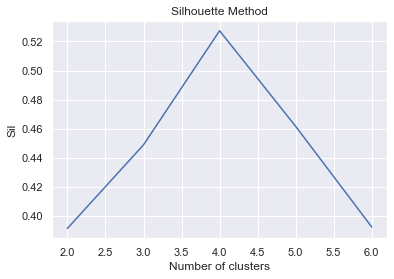

2:0.3912557609258488
3:0.4488126454729053
4:0.5273806053923131
5:0.46152516926853887
6:0.3921949125865572


In [45]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 7):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 7), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Видим, что максимкальное значение у нас достигается при 4х кластерах, т.к. его значение наибольшее. Далее идет 5 кластеров. Выделим 4 кластера на наших данных. Применим метод к-средних с 4мя кластерами и выведем ядра в табличку. 

In [46]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['User ID','Gender','Age','EstimatedSalary','Purchased'])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,0.507339,2.220446e-16,0.344872,0.330598,-7.771561e-16
1,0.494093,1.000000e+00,0.359768,0.344299,-7.216450e-16
2,0.534777,1.000000e+00,0.694187,0.546032,1.000000e+00
3,0.470414,-2.220446e-16,0.654762,0.506846,1.000000e+00


Видим 4 кластера:
- User ID > 0.5, женцины молодого возраста, EstimatedSalary <0.5, Purchased<-3
- User ID < 0.5, мужчины молодого возраста, EstimatedSalary <0.5, Purchased<-3
- User ID > 0.5, мужчины молодого возраста, EstimatedSalary >0.5, Purchased>-3
- User ID > 0.5, женщины молодого возраста, EstimatedSalary >0.5, Purchased>-3
Мы получили некую базу для дальнейшего построения нейронной сети в задачах кластеризации. Сравним полученные данные с предыдущим результатом на основе Hierarchical Clustering

In [49]:
# Importing hc clusters
import pickle
input = open('ZD2.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

Как видим, результат пересекается больше чем на 84.9% поэтому будем считать, что мы на правильном пути.

In [50]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.8493067455043097

Вывод, модель хорошо делится как на 3, так и на 4 кластера. Имеем право применять оба разбиения.